## Analysing Employee Performance for Hr Analytics Using Python and MySQL

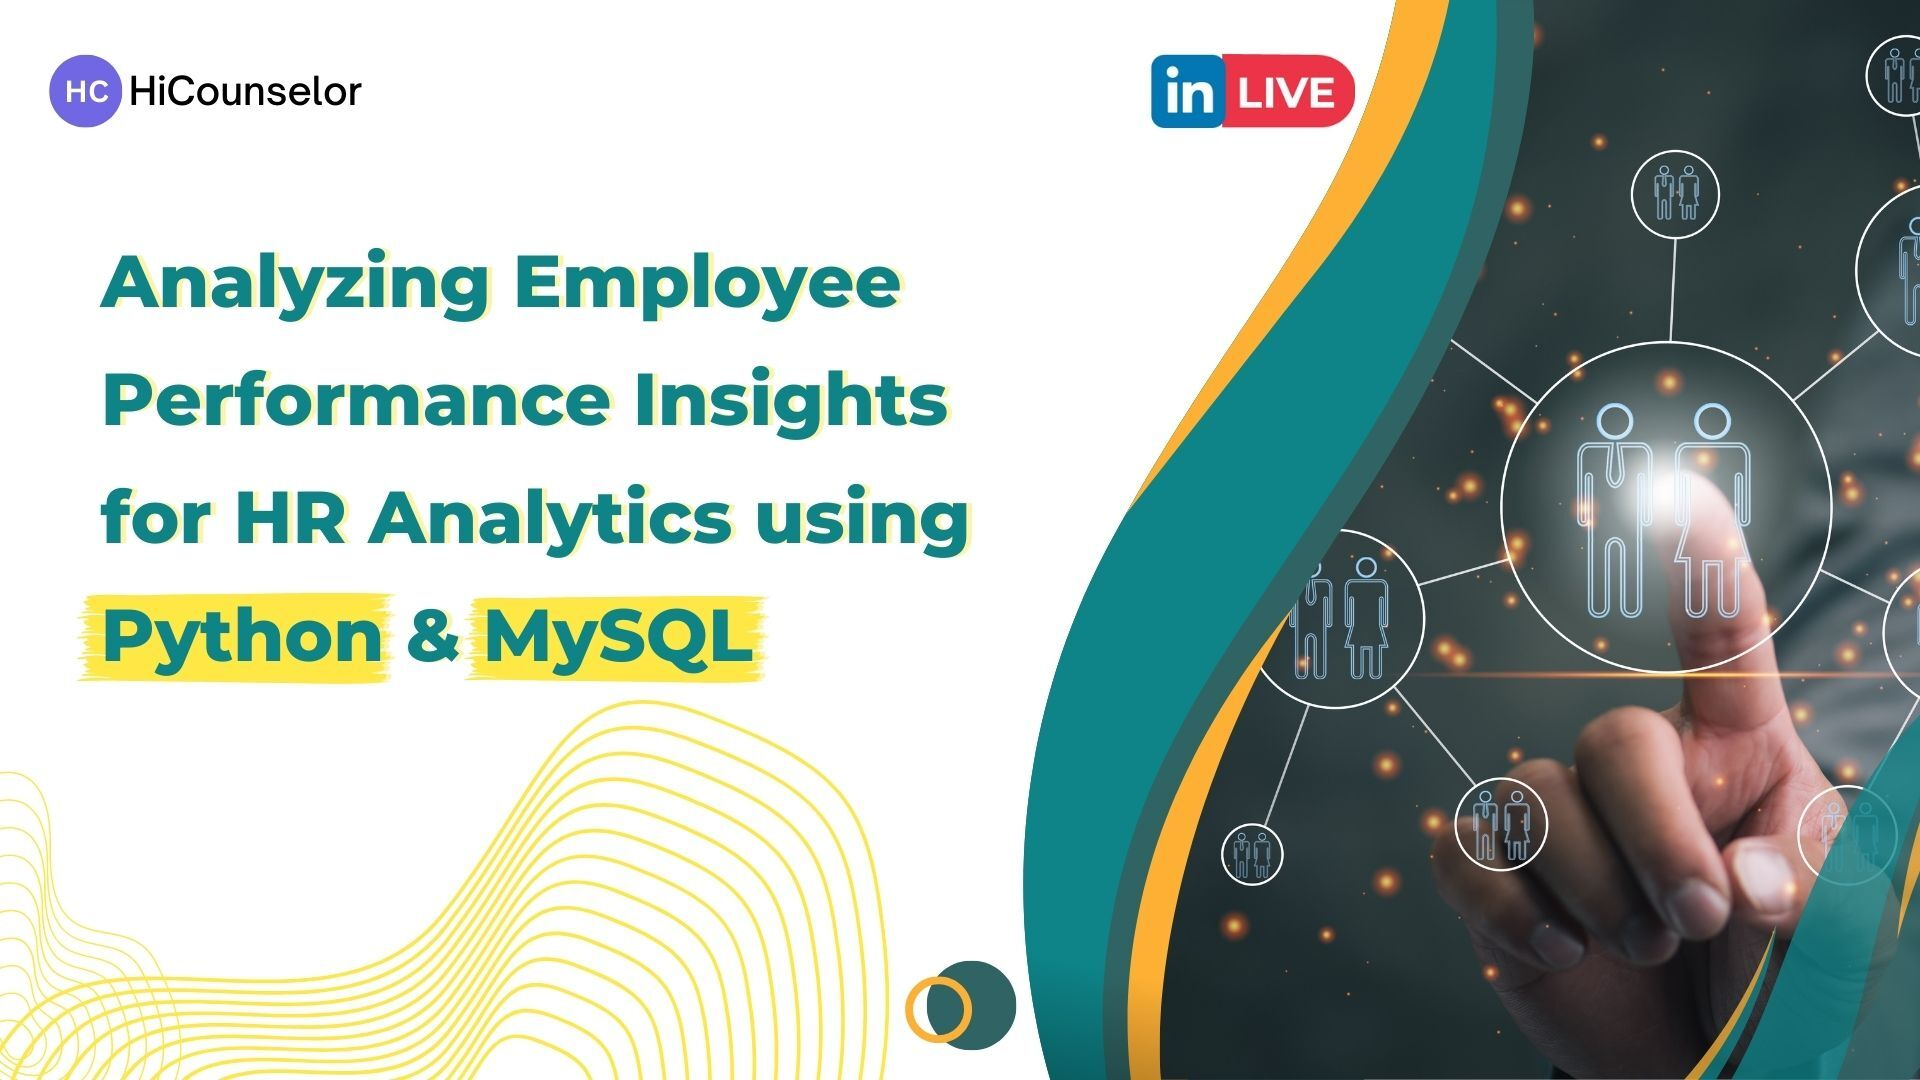

***

## Data Source
I have used the data available at HiCounselor website (_[HR analytics data challenge, 2023](https://hicounselor.com/projects/analysing-employee-performance-for-hr-analytics-using-python-and-mygql)_). The dataset fulfils the requirements for the project and is in the CSV format.

# Data Analysis Concepts Demonstrated

__Data cleaning:__ 
- handling null values, 
- deletion or transformation of irrelevant values, 
- data type transformation, 
- removing duplicates and 
- data validations. 

__SQL Queries:__
- aggregating the data,
- grouping the data,
- ordering the data,
- using case
- sub queries etc

***

# Module 1: Data Preprocessing using python

- **Step 1**: Removing duplicate rows.
- **Step 2**: Removing rows for which numeric columns are having irrelevant data type values
- **Step 3**: Remove irrelevant values from each column if any. Validation all values for a column, Check for any inconsistencies or discrepancies in data types, units, or formats.Feel free to add more validation checks which you might feel necessary for the dataset’s integrity
- **Step 4**: Export the cleaned dataset as a .csv file: prefer UTF-8 encoding.

In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


    #call read_data_from_csv to get dataframe
data=pd.read_csv('Uncleaned_employees_final_dataset.csv')

    # Remove duplicate rows
df=data.drop_duplicates(inplace=False)


    # Remove rows for duplicate values in a specific column
df = df.drop_duplicates(subset='employee_id')
    
    # Filter out rows with irrelevant data type values in numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
df_filtered = df[~df[numeric_columns].apply(lambda x: pd.to_numeric(x, errors='coerce').isna()).any(axis=1)]
    
    # Remove rows with NaN values in a specific column
df_filtered = df_filtered.dropna(subset=['education'])
    

    #export cleaned Dataset to newcsv file named "hrAnalytics_cleaned.csv"
df_filtered.to_csv('hrAnalytics_cleaned.csv')



***

# Module 2: Data Analysing using SQL

In this module, SQL will be used to perform data analysis on the pre-processed data from the previous module. 

In [ ]:
import sqlite3

# Load the CSV file into a DataFrame
fdf = pd.read_csv('hrAnalytics_cleaned.csv')

# Create a SQLite in-memory database and establish a connection
conn = sqlite3.connect(':memory:')

# Store the DataFrame in a SQL table
fdf.to_sql('employee', conn, index=False)

## Task 1
- **Find the average age of employees in each department and gender group.**
- **(Round average age up to two decimal places if needed).**


In [150]:
##code

query = "SELECT department,gender, round(avg(age),2) as avg_age FROM employee group by 1,2"
result = pd.read_sql_query(query, conn)

# Display the query result
print(result1)


           department gender  avg_age
0           Analytics      f    29.88
1           Analytics      m    33.54
2             Finance      f    33.33
3             Finance      m    33.15
4                  HR      f    35.57
5                  HR      m    34.98
6               Legal      f    33.72
7               Legal      m    34.69
8          Operations      f    36.37
9          Operations      m    36.88
10        Procurement      f    36.86
11        Procurement      m    36.73
12                R&D      f    31.69
13                R&D      m    33.40
14  Sales & Marketing      f    34.90
15  Sales & Marketing      m    35.90
16         Technology      f    35.76
17         Technology      m    35.87


***

## Task 2
- **List the top 3 departments with the highest average training scores.**
- **(Round average age up to two decimal places if needed).**

In [149]:
##code

query = "SELECT department, round(avg(avg_training_score),2) as avg_training_score FROM employee group by 1 order by 2 desc limit 3"
result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

   department  avg_training_score
0   Analytics               84.59
1         R&D               84.42
2  Technology               79.81


***

## Task 3
- **Find the percentage of employees who have won awards in each region.**
- **(Round average age up to two decimal places if needed).**

In [148]:
##code

query = "select region, round(count(employee_id) *100/round((select count(*) from employee where awards_won = 1),2),2) as award_percentage from employee where awards_won = 1 group by 1"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

       region  award_percentage
0   region_10              2.71
1   region_11              1.63
2   region_12              0.81
3   region_13              4.88
4   region_14              1.08
5   region_15              6.23
6   region_16              1.90
7   region_17              3.79
8   region_19              0.54
9    region_2             20.33
10  region_20              1.63
11  region_21              0.27
12  region_22              9.21
13  region_23              2.17
14  region_24              0.27
15  region_25              1.36
16  region_26              2.71
17  region_27              5.15
18  region_28              1.63
19  region_29              2.17
20   region_3              1.63
21  region_30              0.54
22  region_31              2.98
23  region_32              1.36
24  region_33              0.54
25  region_34              0.81
26   region_4              4.88
27   region_5              1.36
28   region_6              2.17
29   region_7             10.30
30   reg

***

## Task 4
- **Show the number of employees who have met more than 80% of KPIs for each recruitment channel and education level.**

In [147]:
##code

query = "SELECT recruitment_channel,education,COUNT(*) as emp_count from employee where KPIs_met_more_than_80 =1  group by 1,2"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)


  recruitment_channel        education  emp_count
0               other        Bachelors       2044
1               other  Below Secondary         38
2               other  Masters & above       1003
3            referred        Bachelors        124
4            referred  Below Secondary          2
5            referred  Masters & above         33
6            sourcing        Bachelors       1574
7            sourcing  Below Secondary         34
8            sourcing  Masters & above        723


***

## Task 5
- **Find the average length of service for employees in each department, considering only employees with previous year ratings greater than or equal to 4.**
- **(Round average age up to two decimal places if needed).**

In [146]:
##code

query = "select department, round(avg(length_of_service),2) as avg_length_service from employee where previous_year_rating >= 4 group by 1"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department  avg_length_service
0          Analytics                5.53
1            Finance                5.70
2                 HR                6.07
3              Legal                4.79
4         Operations                6.83
5        Procurement                6.63
6                R&D                4.86
7  Sales & Marketing                6.33
8         Technology                6.31


***

## Task 6
- **List the top 5 regions with the highest average previous year ratings.**
- **(Round average age up to two decimal places if needed).**

In [144]:
##code

query = "select region, round(avg(previous_year_rating),2) as avg_pre_year_rating from employee group by 1 order by 2 desc limit 5"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

      region  avg_pre_year_rating
0  region_25                 3.58
1   region_4                 3.53
2   region_8                 3.50
3  region_28                 3.49
4  region_23                 3.47


***

## Task 7
- **List the departments with more than 100 employees having a length of service greater than 5 years.**


In [143]:
##code

query = "select department, count(*) as emp_num from employee where length_of_service >5  group by 1 having count(*)>100"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department  emp_num
0          Analytics      591
1            Finance      300
2                 HR      332
3         Operations     1720
4        Procurement     1023
5                R&D      115
6  Sales & Marketing     2204
7         Technology      896


***

## Task 8
- **Show the average length of service for employees who have attended more than 3 trainings, grouped by department and gender.**
- **(Round average age up to two decimal places if needed).**

In [151]:
##code

query = "select department,gender,round(avg(length_of_service),2) as avg_LoS from employee where no_of_trainings >3  group by 1,2"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

           department gender  avg_LoS
0           Analytics      m     4.80
1             Finance      m     3.50
2          Operations      f     7.50
3          Operations      m     4.25
4         Procurement      f     4.80
5         Procurement      m     5.92
6                 R&D      m     3.71
7   Sales & Marketing      f     5.00
8   Sales & Marketing      m     5.44
9          Technology      f     6.50
10         Technology      m     7.85


***

## Task 9
- **Find the percentage of female employees who have won awards, per department. Also show the number of female employees who won awards and total female employees.**
- **(Round average age up to two decimal places if needed).**

In [158]:
##code

query = "select department,round((count(case when awards_won = 1 then 1 end)*100)/round(count(*),2),2) as percentage_a_won,count(case when awards_won =1 then 1 end) as fawon_count,count(*) as total_F from employee  where gender ='f' group by 1"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department  percentage_a_won  fawon_count  total_F
0          Analytics              2.29            3      131
1            Finance              2.22            4      180
2                 HR              1.31            4      306
3              Legal              4.00            1       25
4         Operations              3.08           42     1365
5        Procurement              3.35           31      926
6                R&D              0.00            0       16
7  Sales & Marketing              2.14           19      889
8         Technology              2.20           17      772


***

## Task 10
- **Calculate the percentage of employees per department who have a length of service between 5 and 10 years.**
- **(Round average age up to two decimal places if needed).**

In [160]:
##code

query = "select department, round((count(case when length_of_service between 5 and 10 then 1 end)*100/round(count(*),2)),2) as service_per  from employee  group by 1"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department  service_per
0          Analytics        47.63
1            Finance        47.35
2                 HR        45.73
3              Legal        37.98
4         Operations        49.00
5        Procurement        48.19
6                R&D        46.49
7  Sales & Marketing        48.45
8         Technology        45.92


***

## Task 11
- **Find the top 3 regions with the highest number of employees who have met more than 80% of their KPIs and received at least one award, grouped by department and region.**

In [161]:
##code

query = "select department,region, count(*) as noemp from employee where KPIs_met_more_than_80 = 1 and awards_won >=1 group by 1,2 order by 3 desc limit 3"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department    region  noemp
0  Sales & Marketing  region_2     19
1        Procurement  region_2     13
2  Sales & Marketing  region_7     10


***

## Task 12
- **Calculate the average length of service for employees per education level and gender, considering only those employees who have completed more than 2 trainings and have an average training score greater than 75**
- **(Round average age up to two decimal places if needed).**

In [162]:
##code

query = "select education, gender, round(avg(length_of_service),2) as avg_LoS from employee where no_of_trainings >2 and avg_training_score>75 group by 1,2"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

         education gender  avg_LoS
0        Bachelors      f     5.71
1        Bachelors      m     4.53
2  Below Secondary      m     1.67
3  Masters & above      f     6.00
4  Masters & above      m     6.70


***

## Task 13
- **For each department and recruitment channel, find the total number of employees who have met more than 80% of their KPIs, have a previous_year_rating of 5, and have a length of service greater than 10 years.**

In [163]:
##code

query = "select department,recruitment_channel,count(*) as total_emp from employee where KPIs_met_more_than_80=1 and previous_year_rating=5 and length_of_service>10 group by 1,2"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

           department recruitment_channel  total_emp
0           Analytics               other         17
1           Analytics            sourcing          3
2             Finance               other          3
3             Finance            sourcing          4
4                  HR               other          4
5                  HR            referred          1
6                  HR            sourcing          3
7               Legal               other          2
8               Legal            sourcing          2
9          Operations               other         55
10         Operations            sourcing         39
11        Procurement               other         24
12        Procurement            sourcing         14
13                R&D               other          1
14                R&D            sourcing          1
15  Sales & Marketing               other         27
16  Sales & Marketing            sourcing         19
17         Technology               other     

***

## Task 14
- **Calculate the percentage of employees in each department who have received awards, have a previous_year_rating of 4 or 5, and an average training score above 70, grouped by department and gender **
- **(Round average age up to two decimal places if needed).**

In [165]:
##code

query = "select department,gender, round((count(case when awards_won =1 and previous_year_rating>=4 and avg_training_score > 70 then 1 end)*100/round(count(*),2)),2) as award_per from employee group by 1,2"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

           department gender  award_per
0           Analytics      f       1.53
1           Analytics      m       1.15
2             Finance      f       1.11
3             Finance      m       0.19
4                  HR      f       0.33
5                  HR      m       0.00
6               Legal      f       0.00
7               Legal      m       0.00
8          Operations      f       0.51
9          Operations      m       0.36
10        Procurement      f       0.65
11        Procurement      m       0.70
12                R&D      f       0.00
13                R&D      m       1.41
14  Sales & Marketing      f       0.22
15  Sales & Marketing      m       0.19
16         Technology      f       1.42
17         Technology      m       1.65


***

## Task 15
- **List the top 5 recruitment channels with the highest average length of service for employees who have met more than 80% of their KPIs, have a previous_year_rating of 5, and an age between 25 and 45 years, grouped by department and recruitment channel.**
- **(Round average age up to two decimal places if needed).**

In [166]:
##code

query = "select department,recruitment_channel,round(avg(length_of_service),2) as avg_LoS from employee  where KPIs_met_more_than_80 =1 and previous_year_rating=5 and age between 25 and 45  group by 1,2 order by 3 desc  limit 5"

result = pd.read_sql_query(query, conn)

# Display the query result
print(result)

          department recruitment_channel  avg_LoS
0         Operations            referred     6.20
1         Operations               other     6.08
2         Operations            sourcing     5.93
3  Sales & Marketing               other     5.77
4        Procurement            sourcing     5.65


***